In [2]:
libname SASBA '/folders/myfolders/SASBA/SASBA_DATA';

# Chapter 06: Two-Sample t-Test
     used to assess bivariate relationship between categorical independent var and numeric continuous dependent variable
     investigate differences in means when 2 populations of interest are independent use indepedent samples t-test
     Ho: u0=u1 vs Ha: u0^=u1
     
## Pooled Variance t-Test
    when assumed 2 populations' variance are equal, then use pooled variance t-test
    calculates t statistic, and pooled variance
    Assumptions:
        1) obs randomly selected from each of the 2 indep populations
        2) variance of dep var x, for each population are equal -- this allows calculation of pooled variance
        3) distributions of dep var x, are normal for each populations
        pooled variance t-test is robust and can tolerate deviations from normal when sample sizes >30 AND variances are equal
        if not met must use another statistical procedure, or tranform data in a way to create data that is normally distributed

Is earning a bonus on the sale of a house related to square footage of above ground living area?
    Dep var=GR_LIV_AREA
    ind var(grouping)=whether or not agent received a bonus


In [11]:
/* Program 6.1 Independent Sampes t-Test for Mean Differences in Above Ground Living Area */
data ames; 
   set SASBA.ames300;
run;

proc format;
   value yesno 0=No 1=Yes;
run;


proc print data=ames(obs=5 keep=Gr_Liv_Area Bonus);
title 'AMES300 Dataset: First 5 Observations';
run;

Obs,Gr_Liv_Area,Bonus
1,864,0
2,1829,1
3,1328,0
4,1063,0
5,2207,1



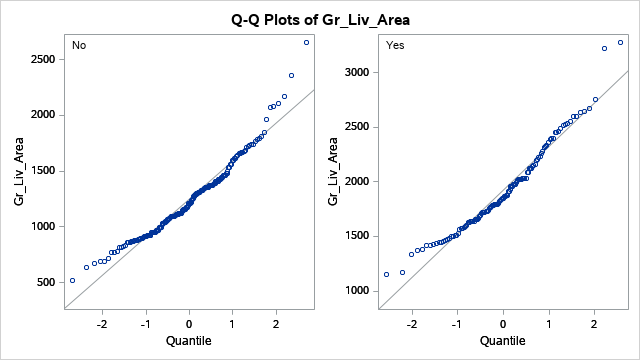

In [9]:
proc ttest data =ames plots (only)=qq alpha=.05 h0=0;      
class bonus; 
var gr_liv_area;  
format bonus yesno.;
	title 'Independent Samples t-test for Mean Differences with Q-Q Plots';
run;

# 6.1 Interpretation
    std deviations are different, giving indication that equal variance assumption is suspect
    difference(1-2) -678.7 is what we are interested in testing; want to know if is large enough, statistically, to conclude one population differs from another
    
    Before conducting t-test, must first test validity of using pool variance t-test by testing equal variance assumption.  Use folded F-statistic to test:
    
    folded F-statistic F=larger sample variance / smaller sample variance
    ** at.05 significance level, do not reject null conclude no significant difference between in variances when comparing both groups; therefore, correct in using the pooled variance t-test
    
    Because p-value less than cutoff .05, reject null, conclude average above ground living area does differ across two groups, other words, BONUS is related to GR_LIV_AREA

# 6.2 Testing Normality Assumption using Kolmogorov-Smirnov Test

Ho: data originates from population that is normal
Ha: data does not originate from population that is normal



In [12]:
/* Program 6.2 Kolmogorov-Smirnov Test of Normality for Above Ground Living Area */
proc univariate data = ames normal;      
   class bonus;
   var gr_liv_area;  
   format bonus yesno.;
title 'Kolmogorov-Smirnov Test of Normality Assumption for Gr_Liv_Area by Bonus';
run;

# 6.2 Interpretation
    K-S Test for 2 groups are 0.0201 and .0231 and less than 0.05 we reject null for both groups
    there is evidence GR_LIV_AREA is non-normal for both groups
    the 2 group sample sizes are relatively large, ok to proceed
    validity of folded-F Test is questionable when populations not normal that case use Levene's
    
 

# Satterthwaite t-Test for Unequal Variances
    when unequal variances using F-fold test, then pool variance t-test is inadequate then must use Satterthwaite

Is receiving a bonus related to the square footage of the basement of the home?
DV=TOTAL_BSMT_SF
IV=BONUS

Ho: u0=u1 vs. Ha: u0^=u1



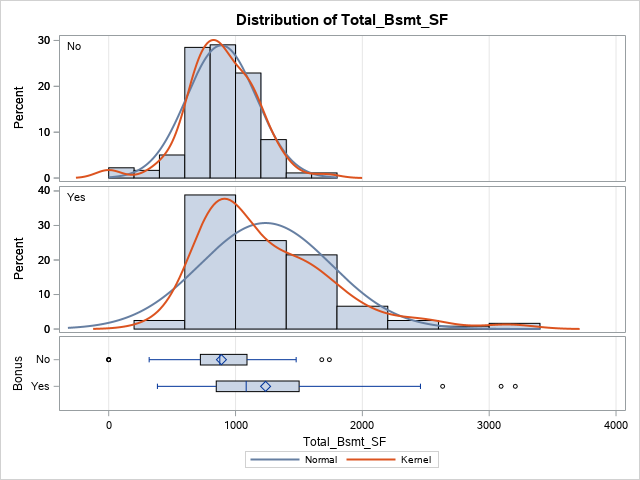
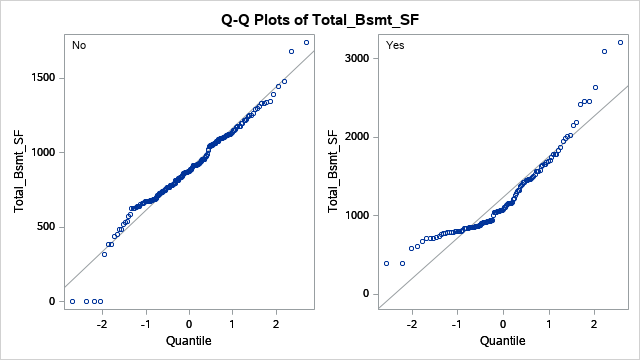

In [3]:
/* Program 6.3 Independent t-Test for Mean Differences in Total Basement Area */
data ames; 
   set SASBA.ames300;
run;

proc format;
   value yesno 0=No 1=Yes;
run;

proc ttest data =ames alpha=.05 h0=0;      
class bonus; 
var total_bsmt_sf;  
format bonus yesno.;
	title 'Independent Samples t-Test for Mean Differences with Q-Q Plots';
run;

# 6.3 Intepretation
difference in std deviations - those earning bonus 2x larger
folded f-Test can see largest variance is 3.55 x larger than smallest variance therefore evidence population variances of TOTAL_BSMT_SF are not equal across groups, so must use Satterthwaite's t-Test

Reject null and conclude sufficient evidence that avg total basement ara differs when comparing two groups
  
# 6.3 Summary of t-Test Independent Populations
    1. Define dep and indep vars, state hypotheses, and run TTEST
    2. Assess normality of dep var of each level of indep var, using histograms, QQ plots, KS-Test; use sample size requirements otherwise considering transforming the vars.  Pay close attention to outliers
    3. Once normality assumption, use Folded f-test to assess equal variance assumption
    4. if folded F-test is not rejected, use pooled variance t-test, if folded F-test is rejected, use Satterthwaite's t-test

## Paired Samples
    d1=difference between X1 and X2
    d2=difference between X1 and X2
    
    Ho: u1=u2 vs.  Ha: u1^=u2

In [5]:
/* 6.4 K-S test of Normality Assumption */
data alt40; 
   set SASBA.alt40;
   difference=total_base_value_2012-total_base_value;
run;

proc print data=alt40(obs=5);
title 'K-S Test of Normality Assumption on Difference Score Using UNIVARIATE';
run;

Obs,Obs,TOTAL_BASE_VALUE_2012,TOTAL_BASE_VALUE,difference
1,11,84900,126300,-41400
2,12,90600,115440,-24840
3,4,337300,359200,-21900
4,9,34500,66080,-31580
5,13,87400,117620,-30220



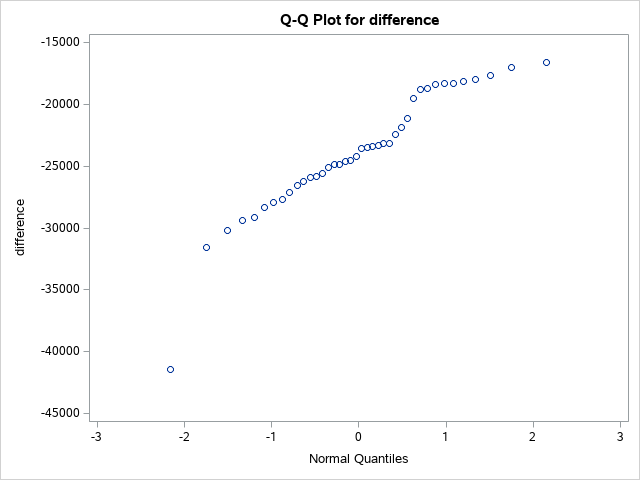

In [7]:
proc univariate data=alt40 normal;
   qqplot / normal;
   var difference;	
   title 'Komolgorov-Smirnov Test Of Normality Assumption On The Difference Score Using The Univariate Procedure';
run;

# 6.4 Interpretation
       K-S test used to test Ho: Data originates from populatoin that is normal vs Ha: data does not originates from population that is normal
       p=value 0.1500 there do not reject, no evidence that difference are not normal


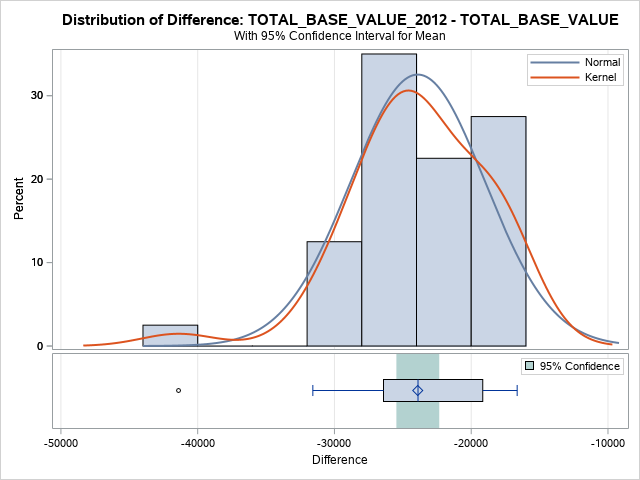
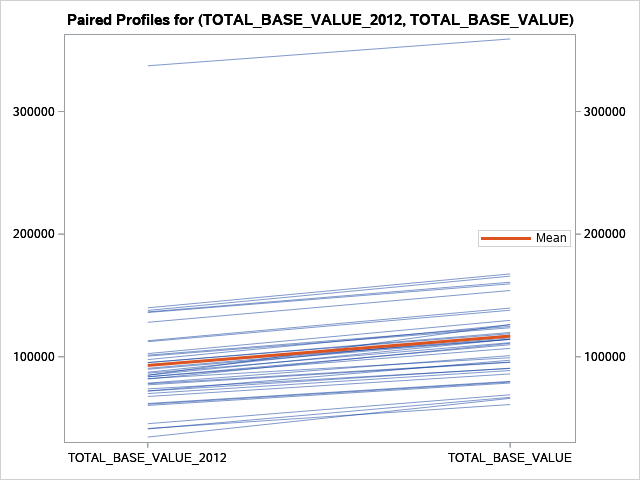
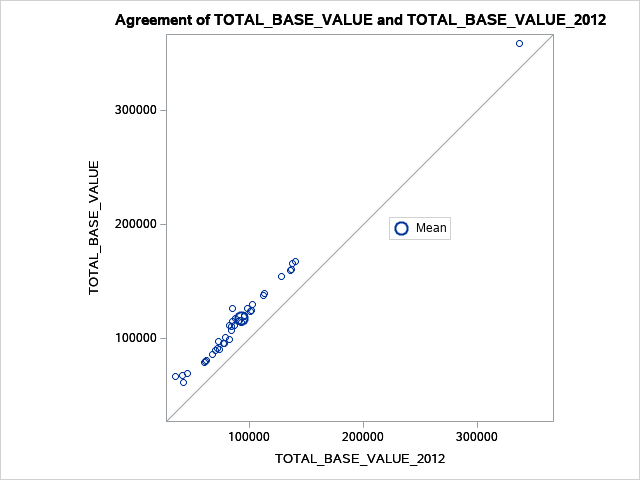
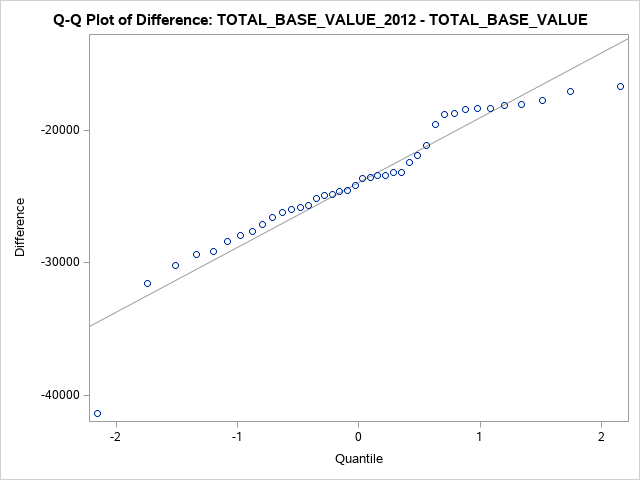

In [8]:
proc ttest data=SASBA.alt40
    plots=qq alpha=.05 h0=0;   
    paired total_base_value_2012*total_base_value; 
    title 'Paired t-test'; 
run; 

# 6.4 Interpretation
    conclude evidence that tax assessed property values are significantly different in 2012 than in 2016